# S03 T05: Exploració de les dades

#### Exercici 1: Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('/Users/deliagonzalezmata/Downloads/DelayedFlights.csv') 

df = df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'AirTime', 'ArrDelay', 'Origin', 'Dest', 'Distance', 'Cancelled']]

df.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,Distance,Cancelled
0,2008,1,3,4,WN,116.0,-14.0,IAD,TPA,810,0
1,2008,1,3,4,WN,113.0,2.0,IAD,TPA,810,0
2,2008,1,3,4,WN,76.0,14.0,IND,BWI,515,0
3,2008,1,3,4,WN,77.0,34.0,IND,BWI,515,0
4,2008,1,3,4,WN,87.0,11.0,IND,JAX,688,0


#### Exercici 2: Fes un informe complet del data set:

* Resumeix estadísticament les columnes d’interès

In [34]:
df.describe()


df.head()

,AirTime,ArrDelay,Origin,Dest,Distance,AvgSpeed,Late,Is_cancelled,Airline,Day_W,Date
0,116.0,-14.0,IAD,TPA,810,6.982759,no,no,Southwest Airlines,Dijous,2008-01-03
1,113.0,2.0,IAD,TPA,810,7.168142,yes,no,Southwest Airlines,Dijous,2008-01-03
2,76.0,14.0,IND,BWI,515,6.776316,yes,no,Southwest Airlines,Dijous,2008-01-03
3,77.0,34.0,IND,BWI,515,6.688312,yes,no,Southwest Airlines,Dijous,2008-01-03
4,87.0,11.0,IND,JAX,688,7.908046,yes,no,Southwest Airlines,Dijous,2008-01-03


* Troba quantes dades faltants hi ha per columna

In [18]:
df.isnull().sum()

Year                0
Month               0
DayofMonth          0
DayOfWeek           0
UniqueCarrier       0
AirTime          8387
ArrDelay         8387
Origin              0
Dest                0
Distance            0
Cancelled           0
dtype: int64

* Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

In [19]:
# nova columna: Velocitat mitjana de vol 

df['AvgSpeed'] = df['Distance'] / df['AirTime']


# nova columna: ha arribat tard?

def delayed_func(x):
    if x > 0:
        return 'yes'
    if x <= 0:
        return 'no'
    else:
        return 'ND'
    
df['Late'] = df['ArrDelay'].apply(delayed_func)


# nova columna: s'ha cancelat?

def cancelled_func(x):
    if x == 0:
        return 'no'
    if x == 1:
        return 'yes'
    else:
        return 'ND'
    
df['Is_cancelled'] = df['Cancelled'].apply(cancelled_func)


# nova columna: noms de les aerolínies

carrier_flights = df['UniqueCarrier'].groupby(df['UniqueCarrier']).count()
carrier_names = pd.Series(['Pinnacle Airlines', 'American Airlines','Aloha Air', 'Alaska Airlines', 'Jetblue Airways',
                      'Cobaltair', 'Delta Air Lines', 'ExpressJet Airlines', 'Frontier Airlines', 'AirTran Airways',
                      'Hawaiian Airlines', 'Envoy Air', 'Northwest Airlines', 'US Airways Express', 
                      'SkyWest Airlines', 'United Airlines', 'US Airways', 'Southwest Airlines',
                      'JetSuiteX Air', 'Mesa Airlines'], index=carrier_flights.index)

dict_name = carrier_names.to_dict()
def name_func(x):
    return dict_name[x]

df['Airline'] = df['UniqueCarrier'].apply(name_func)


# nova columna: noms dels dies de la setmana

days_week = df['DayOfWeek'].groupby(df['DayOfWeek']).count()
days_names = pd.Series(['Dilluns', 'Dimarts','Dimecres', 'Dijous', 'Divendres',
                      'Dissabte', 'Diumenge'], index=days_week.index)

dict_days = days_names.to_dict()
def day_func(x):
    return dict_days[x]

df['Day_W'] = df['DayOfWeek'].apply(day_func)


# nova columna: data del vol

df = df.rename(columns={'DayofMonth': 'Day'})
date = df[['Year', 'Month', 'Day']]
date.head()
df['Date'] = pd.to_datetime(date)


# eliminem columnes que ja no volem

df = df.drop("Year",1) 
df = df.drop("Day",1) 
df = df.drop("Month",1)
df = df.drop("DayOfWeek",1)
df = df.drop("UniqueCarrier",1)
df = df.drop("Cancelled",1)

df.head()

,AirTime,ArrDelay,Origin,Dest,Distance,AvgSpeed,Late,Is_cancelled,Airline,Day_W,Date
0,116.0,-14.0,IAD,TPA,810,6.982759,no,no,Southwest Airlines,Dijous,2008-01-03
1,113.0,2.0,IAD,TPA,810,7.168142,yes,no,Southwest Airlines,Dijous,2008-01-03
2,76.0,14.0,IND,BWI,515,6.776316,yes,no,Southwest Airlines,Dijous,2008-01-03
3,77.0,34.0,IND,BWI,515,6.688312,yes,no,Southwest Airlines,Dijous,2008-01-03
4,87.0,11.0,IND,JAX,688,7.908046,yes,no,Southwest Airlines,Dijous,2008-01-03


In [20]:
# aquí podem veure el recompte de quants vols van arribar tard i quants no:

df[['Late']].value_counts()

Late
yes     1723415
no       204956
ND         8387
dtype: int64

* Taula de les aerolínies amb més endarreriments acumulats

In [21]:
condition = df[df['Late']=='yes']

delay_count = condition[['Airline']].value_counts()

delay_count.head


<bound method NDFrame.head of Airline            
Southwest Airlines     324717
American Airlines      172197
Envoy Air              130647
United Airlines        123989
SkyWest Airlines       121942
Delta Air Lines        100923
JetSuiteX Air           94313
Cobaltair               83646
US Airways              83262
ExpressJet Airlines     75170
Northwest Airlines      72395
AirTran Airways         65008
Mesa Airlines           63289
US Airways Express      49104
Jetblue Airways         48177
Pinnacle Airlines       46896
Alaska Airlines         34179
Frontier Airlines       25708
Hawaiian Airlines        7199
Aloha Air                 654
dtype: int64>

<AxesSubplot:xlabel='Airline'>

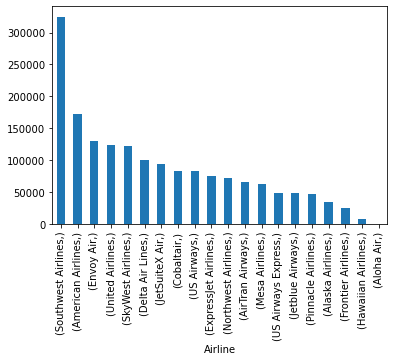

In [22]:
# Si ho posem en format gràfic de barres
delay_count.plot(kind='bar')

* Quins són els vols més llargs? I els més endarrerits? 

In [23]:
# Per saber els vols més llargs:

df_distance = df[['Distance', 'Origin', 'Dest']]
df_distance.sort_values(by='Distance', ascending = False)
df_distance.head()

,Distance,Origin,Dest
0,810,IAD,TPA
1,810,IAD,TPA
2,515,IND,BWI
3,515,IND,BWI
4,688,IND,JAX


In [24]:
# Per saber els vols més endarrerits:

condition = df[df['Late']=='yes']
df_latest = condition[['Airline', 'Origin', 'Dest', 'ArrDelay']]

df_latest = df_latest.sort_values(by='ArrDelay', ascending = False)
df_latest.head()

,Airline,Origin,Dest,ArrDelay
322516,Northwest Airlines,HNL,MSP,2461.0
686014,Northwest Airlines,CLT,MSP,2453.0
839306,Northwest Airlines,RSW,DTW,1951.0
1009553,Envoy Air,LIT,DFW,1707.0
1881639,Northwest Airlines,BOS,MSP,1655.0


#### Exercici 3: Exporta el data set net i amb les noves columnes a Excel.

In [46]:
# creem una mostra del nou data set per poder-lo exportar a Excel, ja que l'original és massa gran:

df_sample = df[:100]


# Exportem a excel la mostra: 

df_sample.to_excel('/Users/deliagonzalezmata/Documents/IT_Academy/Sprint3/S03 T05/new_delayed_flights.xlsx')